# Xbar_R chart

The data should be organised in the following format

- column 1: sample lables named "Sample"
- column 2 to n: are the samples in one subgroup
- no more columns should be present in the dataset

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data = pd.read_csv('control_chart_data.csv')

In [15]:
# Define key titles & lables
x_chart_subtitle = 'Thickness'
x_chart_ylabel = 'Thickness (mm)'
x_chart_xlabel = 'Sample'

In [16]:
# Define for the R chart the graph title and subtitle,
# and the x and y axis labels.
x_chart_title = 'Xbar Control Chart'
r_chart_title = 'Range Control Chart'
r_chart_subtitle = x_chart_subtitle + ' Range'
r_chart_ylabel = x_chart_ylabel + ' Range'
r_chart_xlabel = x_chart_xlabel

In [17]:
data.index = data['Sample']
data.drop('Sample', axis=1, inplace=True)
subgroup_size = len(data.columns) 

In [18]:
control_chart_constants = pd.DataFrame({'n':[  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
                                             15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  30,  35, 
                                             40,  45,  50,  55,  60,  65,  70,  75,  80,  85,  90, 100],
                                        'd2':[1.128, 1.693, 2.059, 2.326, 2.534, 2.704, 2.847, 2.97 , 3.078,
                                              3.173, 3.258, 3.336, 3.407, 3.472, 3.532, 3.588, 3.64 , 3.689,
                                              3.735, 3.778, 3.819, 3.858, 3.895, 3.931, 4.086, 4.213, 4.322,
                                              4.415, 4.498, 4.572, 4.639, 4.699, 4.755, 4.806, 4.854, 4.898,
                                              4.939, 5.015],
                                       'd3':[0.8525, 0.8884, 0.8798, 0.8641, 0.848 , 0.8332, 0.8198, 0.8078,
                                             0.7971, 0.7873, 0.7785, 0.7704, 0.763 , 0.7562, 0.7499, 0.7441,
                                             0.7386, 0.7335, 0.7287, 0.7272, 0.7199, 0.7159, 0.7121, 0.7084,
                                             0.6927, 0.6799, 0.6692, 0.6601, 0.6521, 0.6452, 0.6389, 0.6333,
                                             0.6283, 0.6236, 0.6194, 0.6154, 0.6118, 0.6052] })

In [19]:
d_two = control_chart_constants['d2'][control_chart_constants['n'] == subgroup_size].values[0]
d_three = control_chart_constants['d3'][control_chart_constants['n'] == subgroup_size].values[0]

In [20]:
# create columns for mean & range
data['mean'] = data.mean(axis=1)
data['range'] = data.max(axis=1) - data.min(axis=1)

In [21]:
# R chart statistics

# Calculate average range
average_range = data['range'].mean()

# Calculate the range chart upper control limit.
range_chart_upper_control_limit = average_range + \
    3 * d_three * average_range / d_two
# Calculate the range chart lower control limit.
range_chart_lower_control_limit = average_range - \
    3 * d_three * average_range / d_two

# Set the moving range lower control limit to 0 if it is < 0.
if range_chart_lower_control_limit < 0:
    range_chart_lower_control_limit = 0.0

In [22]:
# Xbar chart statistics
# Calculate average of averages.
average_of_averages = data['mean'].mean()

# Calculate the averages chart upper control limit.
average_chart_upper_control_limit = average_of_averages + \
    3 * average_range / (d_two * np.sqrt(subgroup_size))
# Calculate the averages chart lower control limit.
average_chart_lower_control_limit = average_of_averages - \
    3 * average_range / (d_two * np.sqrt(subgroup_size))

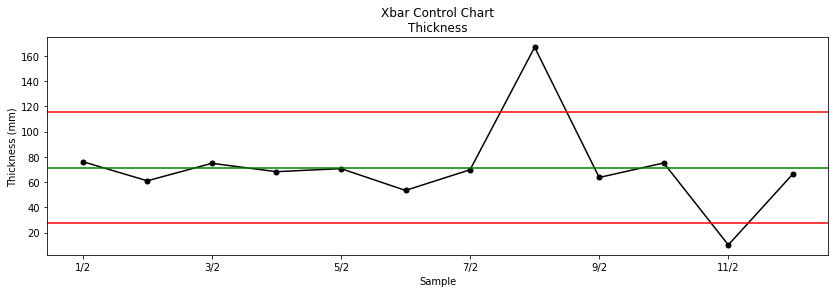

Upper control limit = 115.26
Average = 71.33
Lower control limit = 27.4


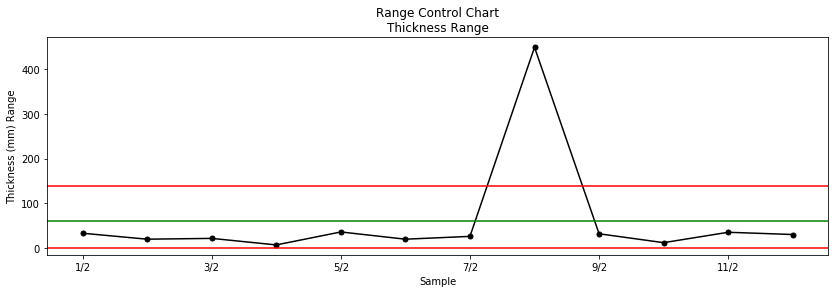

Upper control limit = 137.61
Average moving range = 60.31
Lower control limit = 0.0
___________________________________________
Number of out-of-control points on Xbar chart: 2
If the data are correlated, you may see an increased number of false alarms.
 
    At least 100 data points should be included in the calculations.
    

    (0.17) subgroup is out of control on the Xbar chart
    (You may see 0.7% out-of-control subgroups on the Xbar chart 
    and 0.3% out-of-control subgroups on the S chart by chance, 
    even when the process is stable)
    


In [23]:
plt.figure(figsize = (14,4))
# Create a graph of "average values v. sample".
ax = data['mean'] .plot.line(legend=False,
                                               marker='o',
                                               markersize=5,
                                               color='black')
ax.axhline(y=average_of_averages, color='green')
ax.axhline(y=average_chart_upper_control_limit, color='r')
ax.axhline(y=average_chart_lower_control_limit, color='r')

# Add the chart title and subtitle.
ax.set_title(x_chart_title + '\n' + x_chart_subtitle)
# Add the Y axis label.
ax.set_ylabel(x_chart_ylabel)
# Add the X axis label.
ax.set_xlabel(x_chart_xlabel)
plt.show()


# Average Control chart statistics
print('Upper control limit',
      np.round(average_chart_upper_control_limit, 2),
      sep=' = ')
print('Average',
      np.round(average_of_averages, 2),
      sep=' = ')
print('Lower control limit',
      np.round(average_chart_lower_control_limit, 2),
      sep=' = ')

# Create a graph of "range values v. sample".
plt.figure(figsize = (14,4))

ax = data['range'].plot.line(legend=False,
                                                marker='o',
                                                markersize=5,
                                                color='black')
ax.axhline(y=average_range, color='green')
ax.axhline(y=range_chart_upper_control_limit, color='r')
ax.axhline(y=range_chart_lower_control_limit, color='r')

# Add the chart title and subtitle.
ax.set_title(r_chart_title + '\n' + r_chart_subtitle)
# Add the Y axis label.
ax.set_ylabel(r_chart_ylabel)
# Add the X axis label.
ax.set_xlabel(r_chart_xlabel)
plt.show()

# Average range chart statistics
print('Upper control limit',
      range_chart_upper_control_limit.round(2),
      sep=' = ')
print('Average moving range',
      np.round(average_range, 2),
      sep=' = ')
print('Lower control limit',
      np.round(range_chart_lower_control_limit, 2),
      sep=' = ')

print('___________________________________________')

# Warnings

# Find points outside control limits
points_over_ucl = data.loc[((data['mean']) > average_chart_upper_control_limit), :]
points_under_lcl = data.loc[((data['mean']) < average_chart_lower_control_limit), :]
out_of_control_points = len(points_over_ucl) + len(points_under_lcl)

total_data_points = len(data)

print( f'Number of out-of-control points on Xbar chart: {out_of_control_points}')
print('If the data are correlated, you may see an increased number of false alarms.')

if total_data_points <100:
    print(""" 
    Warning: You may not have enough data to estimate precise control limits.
    At least 100 data points should be included in the calculations.
    """)

if (out_of_control_points/total_data_points) > 0.05:
    print(f"""
    Warning: Evaluate the % of out-of-control subgroups  
    ({np.round(out_of_control_points/total_data_points, 2)}) subgroup is out of control on the Xbar chart
    (You may see 0.7% out-of-control subgroups on the Xbar chart 
    and 0.3% out-of-control subgroups on the S chart by chance, 
    even when the process is stable)
    """)